# High-Dimensional Fittings

Now we fit higher degree polynomials to the data and compare the results and errors.

## Importing the libraries

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

We load the data and define the respective vectors with the temperature and with the density values.

In [2]:
water_csv = list(csv.reader(open('water.csv',"r"), delimiter=","))
header = dict([(water_csv[0][i],water_csv[1][i]) for i in range(3)])
datapoints = np.loadtxt(open('water.csv', "r"), delimiter=",", skiprows=2)
T, f = np.loadtxt(open('water.csv', "r"), delimiter=",", skiprows=2, usecols=(0,1), unpack=True)
N = len(T)
N_half = int(N/2)

### The Vandermonde matrices

We build a number of Vandermonde matrices, up to the number of data points available.

In [3]:
A = list()
for j in range(N_half):
    A.append(np.vstack([T**i for i in range(j+1)]).T)

### Solving the least-square problems

In [4]:
a = list()
for j in range(N_half):
    a.append(np.linalg.lstsq(A[j], f, rcond=None)[0])

### Building the approximating polynomials

In [5]:
p = list()
for j in range(N_half):
    p.append(np.array(sum([a[j][i]*T**i for i in range(j+1)])))

### Plotting the approximations

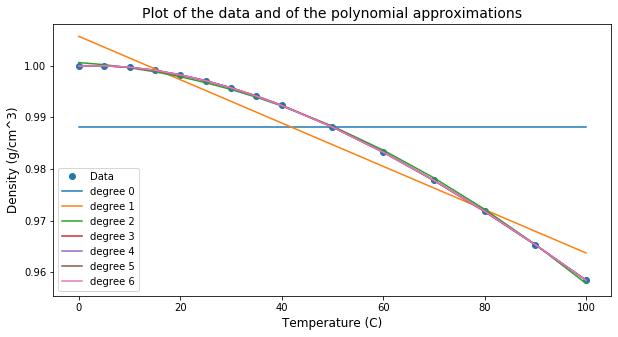

In [6]:
plt.figure(figsize=(10,5))
plt.plot(T, f, 'o', label='Data', color='tab:blue')
for j in range(N_half):
    plt.plot(T, p[j], label=f'degree {j}')
plt.title('Plot of the data and of the polynomial approximations', fontsize=14)
plt.xlabel(header['temp'], fontsize=12)
plt.ylabel(header['density'], fontsize=12) 
plt.legend()
plt.show()

### Calculating the mean quadratic errors

In [7]:
Err = list()
for j in range(N_half):
    Err.append(np.linalg.lstsq(A[j], f, rcond=None)[1][0]/N)
    print(f'j={j}: Error={Err[j]:.2e}')

j=0: Error=1.75e-04
j=1: Error=9.22e-06
j=2: Error=1.33e-07
j=3: Error=3.16e-09
j=4: Error=3.27e-10
j=5: Error=2.64e-10
j=6: Error=2.64e-10


### Plotting the mean quadratic errors

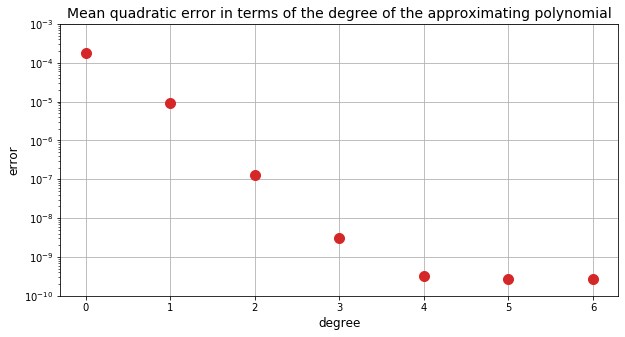

In [8]:
plt.figure(figsize=(10,5))

plt.plot(range(len(Err)), Err, 'o', color='tab:red', markersize=10)
plt.grid(True)
plt.yscale('log')
plt.ylim(10**(-10), 10**(-3))
plt.title('Mean quadratic error in terms of the degree of the approximating polynomial', fontsize=14)
plt.xlabel('degree', fontsize=12)
plt.ylabel('error', fontsize=12)
plt.show()

Notice how there is not much advantage going beyond degree four.